# Welcome to Jupyter!

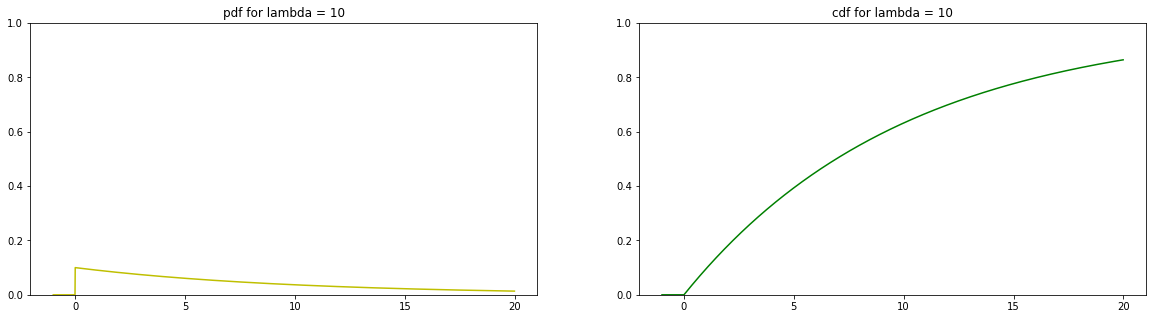

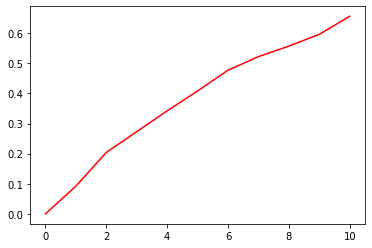

емпірична медіана 6.61286970207859
емпіричний нижній квартиль 2.6260007292447094
емпіричний верхній квартиль 13.420805821489628
теоретична медіана 6.931471805599453
теоретичний нижній квартиль 2.876820724517809
теоретичний верхній квартиль 13.862943611198906


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon


 


x = np.arange(-1, 20,0.01)
x1 = np.arange(0, 11) 


lmd = 10
loc = 0
scale = lmd
fig, axs = plt.subplots(1,2, figsize=(20,5))
y = expon.pdf(x, loc=loc, scale=scale)
axs[0].plot(x,y, 'y')
axs[0].set_title('pdf for lambda = {}'.format(scale))
axs[0].set_ylim(0, 1)
     
y1 = expon.cdf(x, loc=loc, scale=scale)
axs[1].plot(x,y1, 'g')
axs[1].set_title('cdf for lambda = {}'.format(scale))
axs[1].set_ylim(0, 1)
     
  

    
plt.show()
expon_rvs =expon.rvs(scale=scale,  size=1000)
my_list=[]

for i in x1:
    my_list.append(sum((expon_rvs)<i))
#print(my_list)
emp_cdf=np.array(my_list)/1000
#print(emp_cdf)

plt.plot(x1,emp_cdf, 'r')
plt.show()
print ('емпірична медіана', np.sort(expon_rvs)[500])
print ('емпіричний нижній квартиль', np.sort(expon_rvs)[250])
print ('емпіричний верхній квартиль', np.sort(expon_rvs)[750])
print('теоретична медіана',  expon.ppf(0.5, loc=loc, scale=scale))
print( 'теоретичний нижній квартиль', expon.ppf(0.25, loc=loc, scale=scale))
print( 'теоретичний верхній квартиль', expon.ppf(0.75, loc=loc, scale=scale))

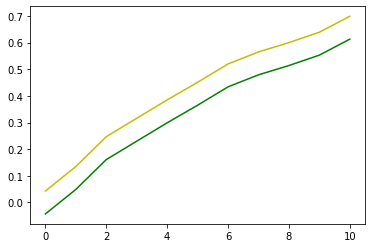

In [16]:
# довірчий інтервал
def F_empir (x):
    return(sum(x>expon_rvs)/1000)
y3=[]
y4=[]
xp=1.36/(1000**0.5)
for i in x1:
    y3.append (F_empir (i)-xp)
    y4.append (F_empir (i)+xp)
y3=np.array(y3)
y4=np.array(y4)  
plt.plot(x1,y3, 'g')
plt.plot(x1,y4, 'y')
plt.show()